## 1. 기사를 가져와 형태소 분석하기 위해 제목과 기사내용 토큰화 및 품사부착

In [42]:
import pandas as pd 
import numpy as np
food_news = pd.read_csv('C:/Users/이상은/food_news.csv')
food_news = food_news.drop(columns  = 'Unnamed: 0')
food_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     22 non-null     object
 1   title    22 non-null     object
 2   press    22 non-null     object
 3   content  22 non-null     object
 4   url      22 non-null     object
dtypes: object(5)
memory usage: 1008.0+ bytes


In [2]:
#불필요한 단어들 토큰화하기 전에 제거 : 함수 만들어주기 --> 함수를 food_new['content']에다 적용하기 
import re 
def preprocess(text):
    text = re.sub('\t|\n|\r','',text).strip()
    text = re.sub('구독해주세요','',text).strip()
    text = re.sub('구독하기', '', text).strip()
    text = re.sub('무단 전재 및 재배포 금지', '', text).strip()
    text = re.sub('바로가기', '', text).strip()
    text = re.sub('All rights reserved', '', text).strip()
    return text
food_news['content'] = food_news['content'].map(lambda x : preprocess(x))

In [3]:
food_news.head(10)

,date,title,press,content,url
0,2020.09.10,"경북도, ‘코로나 면역 효자’ 김치산업 제대로 키운다",국민일보,면역력 관심 반영 수출·내수 급증… 2024년까지 1283억 투입 집중육성경북도는...,https://search.naver.com/search.naver?&where=n...
1,2020.09.09,"경북도 ""김치산업 중심지 될 것""...5년간 1283억원 투입",뉴시스,풍산김치 (사진=안동시 제공)[안동=뉴시스] 류상현 기자 = 경북도가 김치산업 육성...,https://search.naver.com/search.naver?&where=n...
2,2020.09.10,"국민의힘, 정기국회 중점 입법…코로나·부동산법 우선 처리",뉴시스,"국민의힘 정책위, 정기국회 5대 분야 30대 과제 선정'조국 아빠찬스' '윤미향 방...",https://search.naver.com/search.naver?&where=n...
3,2020.09.04,국가식품클러스터 우수제품 온라인 판매…식품축제 개막,연합뉴스TV,동영상 뉴스전북 익산시 국가식품클러스터 입주 기업들의 우수 제품을 온라인으로 판매하...,https://search.naver.com/search.naver?&where=n...
4,2020.09.05,‘우리농수산식품모음집’에서 추석 선물세트 고민 해결하세요,세계일보,코로나19의 시련 속에도 추석은 다가온다. 고마운 이들에게 어떤 선물로 마음을 전해...,https://search.naver.com/search.naver?&where=n...
5,2020.09.04,코로나 장기화에… 불 붙은 '밀키트' 전쟁,조선비즈,양념·재료·요리법까지…간편함 내세워 승부장바구니 물가 급등해 밀키트 구매가 경제적코...,https://search.naver.com/search.naver?&where=n...
6,2020.09.04,“익산 식품축제 오지 말고 접속하세요”,헤럴드경제,식품진흥원 국내 최초 온라인 개최10일까지 42개사 301개 제품 판매한국식품산업클...,https://search.naver.com/search.naver?&where=n...
7,2020.09.04,농식품 수출은 ‘코로나 특수’ 올 4.9% 늘었다,조선일보,"코로나 사태로 우라나라 수출이 ‘직격탄’을 맞았지만, 농식품 수출은 되레 작년보다 ...",https://search.naver.com/search.naver?&where=n...
8,2020.09.09,대상 'K뷰티'로 이커머스 시장 접속,서울경제,자회사 디에스엔 '100LABS' 론칭바이오 기술·식품관련 인프라 접목목욕용품 등 ...,https://search.naver.com/search.naver?&where=n...
9,2020.09.09,소이오일 마스터를 아십니까.,헤럴드경제,출처 : 미국대두협회[헤럴드경제] ‘소이오일 마스터’.다소 생소하지만 단순히 식품을...,https://search.naver.com/search.naver?&where=n...


In [4]:
from konlpy.tag import Mecab 
mecab = Mecab()

mecab_tokens = []
for i in range(len(food_news)):
        mecab_tokens.append(mecab.pos(food_news['title'][i])) #토큰화하면서 품사부착 동시에 해줄 수 있음 
        mecab_tokens.append(mecab.pos(food_news["content"][i]))

mecab_tag = []
for token in mecab_tokens: 
    mecab_tag += token

In [132]:
# mecab_tokens[0] 하면 title에 해당되는 tokens 반환 
# [1]하면 content에 해당되는 tokens 반환 

## 3. 불용어 처리(Stopword)

In [5]:
from collections import Counter 
Counter(mecab_tag).most_common()

[(('.', 'SF'), 473),
 (('을', 'JKO'), 403),
 ((',', 'SC'), 319),
 (('다', 'EF'), 303),
 (('에', 'JKB'), 277),
 (('의', 'JKG'), 247),
 (('이', 'JKS'), 236),
 (('를', 'JKO'), 234),
 (('고', 'EC'), 233),
 (('는', 'ETM'), 223),
 (('하', 'XSV'), 207),
 (('는', 'JX'), 181),
 (('으로', 'JKB'), 148),
 (('등', 'NNB'), 147),
 (('가', 'JKS'), 141),
 (('은', 'JX'), 139),
 (('도', 'JX'), 135),
 (('로', 'JKB'), 122),
 (('.', 'SY'), 119),
 (('식품', 'NNG'), 117),
 (('있', 'VX'), 113),
 (('에서', 'JKB'), 105),
 (('(', 'SSO'), 100),
 ((')', 'SSC'), 94),
 (("'", 'SY'), 87),
 (('들', 'XSN'), 84),
 (('한', 'XSA+ETM'), 83),
 (('과', 'JC'), 82),
 (('이', 'VCP'), 78),
 (('했', 'XSV+EP'), 76),
 (('코로나', 'NNP'), 73),
 (('해', 'XSV+EC'), 72),
 (('은', 'ETM'), 71),
 (('‘', 'SY'), 66),
 (('산업', 'NNG'), 66),
 (('·', 'SC'), 62),
 (('"', 'SY'), 61),
 (('원', 'NNBC'), 60),
 (('억', 'NR'), 57),
 (('것', 'NNB'), 57),
 (('’', 'SY'), 56),
 (('일', 'NNBC'), 56),
 (('와', 'JC'), 55),
 (('지원', 'NNG'), 52),
 (('▶', 'SY'), 52),
 (('19', 'SN'), 51),
 (('%', 'S

In [6]:
stopPos = ['JKO', 'JKB', 'EC', 'JX', 'EF', 'SY', 'SN', 'XSV+EP', 'XSV+ETM', 'JC', 'SN', 'SSO', 'SSC','MAJ', 'VV']
stopWord = ['코로나', '▶', '은', '가', '건', '것', '이', '있', '하', '같', 't', '만', '저작권자', '연합뉴스TV', '뉴시스', '국민일보' '세계일보', '서울경제' '조선비즈', '헤럴드경제']

food_article = []
for tag in mecab_tag:
    if tag[1] not in stopPos:
        if tag[0] not in stopWord:
            food_article.append(tag[0])
print(food_article)

['경북', ',', '면역', '효자', '김치', '산업', '제대로', '키운다', '면역력', '관심', '반영', '수출', '·', '내수', '급증', '…', '년', '억', '투', '입', '집중', '육성', '경', '북도', '최근', '면역', '강화식품', '주목', '는', '김치', '산업', '집중', '육성', '기', '위해', '경상북도', '김치', '산업', '육성', '방안', '발표', '.', '사진', '안동', '풍산', '농협', '김치', '.', '안', '동시', '제공', '경', '북도', '김치', '산업', '의', '중심지', '거듭', '난다는', '전략', '마련', '.', '경북', '면역', '강화식품', '주목', '는', '김치', '산업', '집중', '육성', '기', '위한', '경상북도', '김치', '산업', '육성', '방안', '일', '발표', '.', '신종', '바이러스', '감염증', '확산', '건강', '대한', '관심', '면역력', '높여', '주', '는', '식품', '주목', '는', '가운데', '최근', '김치', '수출', '급증', '.', '프랑스', '몽펠리에', '대학', '장', '부스', '케', '교수', '사망률', '상대', '적', '낮', '한국', '독일', '공통', '적', '발효', '채소', '연구', '결과', '발표', '이후', '다', '.', '한국', '농수산', '식품', '유통', '공사', '의', '국내', '김치', '수출', '현황', '올', '월', '달러', '지난해', '기간', '의', ',', '달러', '비해', '수출', '량', '수출', '금액', '증가', '.', '기간', '경북', '내', '수출', ',', '달러', ',', '달러', '늘어났', '.', '경북', '경상북도', '김치', '산업', '육성', '방안', '수립', '년', '인프라', '구축', 

In [30]:
file2write=open("food_article",'w')
file2write.write(food_article)
file2write.close()

TypeError: write() argument must be str, not list

## 별도) 키워드 추출하기 

In [7]:
from konlpy.tag import Mecab 
mecab = Mecab()

mecab_tokens2 = []
for i in range(len(food_news)):
        mecab_tokens2.append(mecab.nouns(food_news['title'][i])) #토큰화하면서 품사부착 동시에 해줄 수 있음 
        mecab_tokens2.append(mecab.nouns(food_news["content"][i]))

mecab_tag2 = []
for token in mecab_tokens2: 
    mecab_tag2 += token

In [41]:
from collections import Counter 
KW = Counter(mecab_tag2).most_common()
food_df = pd.DataFrame(KW, columns = ['단어', '언급횟수'])
food_df = food_df.nlargest(70, '언급횟수')
food_df.tail(50)

,단어,언급횟수
20,기업,32
21,학생,32
22,온라인,31
23,수출,30
24,부,30
25,업계,30
26,오뚜기,30
27,개,29
28,경제,29
29,기자,27


In [67]:
food_df.to_csv('C:/Users/이상은/top50_keywords.csv')

## top 50위 단어들을 가지고 워드클라우드 만들기 

In [32]:
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
dataset = open("C:/Users/이상은/top50_keywords.csv", "r").read()


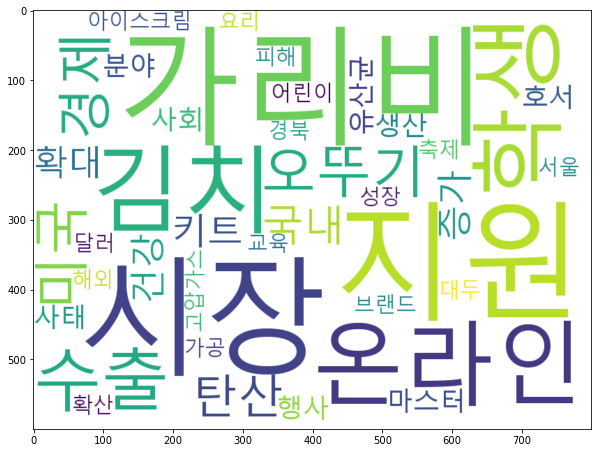

In [33]:
#한글은 깨지기 때문에 C드라이브 > fonts 검색 > 맑은 고딕 등 > 바탕화면에 불어넣기 > 아래 path 입력하기 
path = 'malgun.ttf'
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname=path)

def create_word_cloud(string):
    maskArray = npy.array(Image.open("C:/Users/이상은/shape.png"))
    cloud = WordCloud(font_path =path, background_color = "white", width=800, height=600)
    cloud.generate(string)
    cloud.to_file("C:/Users/이상은/wordCloud.png")
    pPlot.figure(figsize=(10,8))
    pPlot.imshow(cloud, interpolation = 'bilinear')
    return pPlot.show()

dataset = dataset.lower()
create_word_cloud(dataset)